In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.dates as mdates

In [3]:
# Useful Links
# https://www.census.gov/library/publications/2011/compendia/usa-counties-2011.html

In [15]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

def update_county_names(x):
    if 'US' in x:
        x = x[:-4]
    
    for a in us_state_abbrev.keys():
        if a in x:
            index = -1 * len(a)
            x = x[:index]
            x = x + us_state_abbrev[a]
    
    return x

def update_income(x):
    if type(x) == str:
        x = x.replace('$', '')
        x = x.replace(',', '')
    return int(x)

def update_num(x):
    x = x.replace(',', '')
    return int(x)

In [18]:
# Load COVID-19 case data
# TODO: download most recent data
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
raw = pd.read_csv('05-10-2020.csv')

# Drop unnecessary columns and remove all regions that are not US counties
raw = raw.drop(['FIPS', 'Last_Update', 'Long_'], axis=1)
raw.drop(raw[raw['Country_Region'] != 'US'].index, inplace=True)
raw.dropna(inplace=True)

# Rename columns
raw.rename(columns={'Lat':'Latitude', 'Combined_Key': 'County'},inplace=True)
    
raw['County'] = raw['County'].apply(update_county_names)

# Set 'County' as index
raw = raw.groupby('County').sum()

# Load population data
population = load_geo_data('PopulationEstimates.csv', ['FIPS', 'State', 'Area_Name'], {}, 'County')
raw = pd.concat([raw, population['POP_ESTIMATE_2018']], axis=1)
raw.dropna(inplace=True)
raw.rename(columns={'POP_ESTIMATE_2018':'Population'},inplace=True)
raw['Population'] = raw['Population'].apply(update_num)


# Filter out counties with less than min_sample_size
min_sample_size = 5000
raw = raw[raw['Confirmed'] >= min_sample_size]

raw

,Latitude,Confirmed,Deaths,Recovered,Active,Population
"Bergen, NJ",40.960109,16929.0,1355.0,0.0,15574.0,936692
"Broward, FL",26.151847,5858.0,257.0,0.0,5601.0,1951260
"Cook, IL",41.841448,52655.0,2317.0,0.0,50338.0,5180493
"Dallas, TX",32.766706,5870.0,143.0,0.0,5727.0,2637772
"District of Columbia, DC",38.904178,6272.0,323.0,0.0,5949.0,702455
"Essex, MA",42.668763,11353.0,644.0,0.0,10709.0,790638
"Essex, NJ",40.786813,15646.0,1423.0,0.0,14223.0,799767
"Fairfax, VA",38.836776,5892.0,239.0,0.0,5653.0,1150795
"Fairfield, CT",41.268099,13236.0,1024.0,0.0,12212.0,943823
"Harris, TX",29.860000,7878.0,172.0,0.0,7706.0,4698619


In [20]:
# Load county geographical data
def load_geo_data(file, dropCols, dropRows, indexCol):
    df = pd.read_csv(file)
    for d in dropRows.keys():
        df.drop(df[df[d] != dropRows[d]].index, inplace=True)
    df.drop(dropCols, axis=1, inplace=True)
    df.dropna(inplace=True)
    df[indexCol] = df[indexCol].apply(lambda x: x.replace(' County', ''))
    df.set_index(indexCol, drop=True, inplace=True)
    
    return df

# Load temperature data
temp = load_geo_data('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).csv', 
                     ['County Code', 'Avg Daily Max Air Temperature (C)', 'Avg Daily Min Air Temperature (C)'], {}, 'County')
temp

# Load heat index data
# Heat index = "how hot it really feels when relative humidity is factored in with the actual air temperature"
heat_index = load_geo_data('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011)-2.csv',
                           ['County Code'], {}, 'County')
heat_index = heat_index[heat_index['Avg Max Heat Index (C)'] != 'Missing']
heat_index['Avg Max Heat Index (C)'] = heat_index['Avg Max Heat Index (C)'].apply(lambda x: float(x))
heat_index

# Load unemployment data
unemploy = load_geo_data('Unemployment.csv', ['FIPS', 'State', 'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013', ' Civilian_labor_force_2007 ', ' Employed_2007 ',
       ' Unemployed_2007 ', 'Unemployment_rate_2007',
       ' Civilian_labor_force_2008 ', ' Employed_2008 ', ' Unemployed_2008 ',
       'Unemployment_rate_2008', 'Civilian_labor_force_2009', 'Employed_2009',
       'Unemployed_2009', 'Unemployment_rate_2009',
       ' Civilian_labor_force_2010 ', ' Employed_2010 ', ' Unemployed_2010 ',
       'Unemployment_rate_2010', ' Civilian_labor_force_2011 ',
       ' Employed_2011 ', ' Unemployed_2011 ', 'Unemployment_rate_2011',
       ' Civilian_labor_force_2012 ', ' Employed_2012 ', ' Unemployed_2012 ',
       'Unemployment_rate_2012', ' Civilian_labor_force_2013 ',
       ' Employed_2013 ', ' Unemployed_2013 ', 'Unemployment_rate_2013',
       ' Civilian_labor_force_2014 ', ' Employed_2014 ', ' Unemployed_2014 ',
       'Unemployment_rate_2014', ' Civilian_labor_force_2015 ',
       ' Employed_2015 ', ' Unemployed_2015 ', 'Unemployment_rate_2015',
       ' Civilian_labor_force_2016 ', ' Employed_2016 ', ' Unemployed_2016 ',
       'Unemployment_rate_2016', 'Civilian_labor_force_2017', 'Employed_2017',
       'Unemployed_2017', 'Unemployment_rate_2017'], {},'Area_name')
unemploy

# Load poverty data
poverty = load_geo_data('PovertyRate.csv', ['Area_name', 'State', 'POVALL_2018', 'POP_ESTIMATE_2018'], {}, 'County')
poverty.rename({'Unnamed: 5': 'Poverty Rate'}, axis=1, inplace=True)
poverty

# Load presidential voting data
# Source: https://electionlab.mit.edu/data
pres_vote = load_geo_data('countypres_2000-2016.csv', ['state', 'state_po', 'county_short', 'FIPS', 'candidate',
                        'office', 'year', 'party'], {'party': 'democrat'}, 'County')
pres_vote

# Load pollution data
pollution = load_geo_data('annual_aqi_by_county_2019.csv', ['State', 'County (Short)', 'Year', 'Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'], 
        {}, 'County')
pollution.rename(index=update_county_names, inplace=True)
pollution

# Load land area data
area = load_geo_data('LND01.csv', [], {}, 'County')
area.rename({'LND010200D': 'Land Area (mi^2)'}, axis=1, inplace=True)
area

,Land Area (mi^2)
County,
UNITED STATES,3794083.06
ALABAMA,52419.02
"Autauga, AL",604.45
"Baldwin, AL",2026.93
"Barbour, AL",904.52
...,...
"Sweetwater, WY",10491.17
"Teton, WY",4221.80
"Uinta, WY",2087.56


In [23]:
# Calculate death rate for each country
def cal_rate(rate, total, colName):
    df = pd.Series(dtype = float)
    
    # Calculating rate
    if (rate.index == total.index).all():
        df = rate/(total + rate)
    else:
        print('Whoops, looks like your counties dont match')
    
    # Drop countries that have a null rate (for death rate, don't have any cases)
    df.dropna(inplace=True)
    
    df = pd.DataFrame(df)
    df.rename(columns={df.columns[0]:colName},inplace=True)
    
    return df

# Get most recent numbers
total_confirmed = raw['Confirmed']
total_deaths = raw['Deaths']
total_pop = raw['Population']

# Calculate death rate
death_rate = cal_rate(total_deaths, total_confirmed, 'Death Rate')
death_rate

# Calculate incidence rate
incidence_rate = cal_rate(total_confirmed, total_pop, 'Incidence Rate')
incidence_rate

# # Calculate hospitalization rate
# hosp_rate = cal_rate()

,Incidence Rate
"Bergen, NJ",0.017752
"Broward, FL",0.002993
"Cook, IL",0.010062
"Dallas, TX",0.002220
"District of Columbia, DC",0.008850
"Essex, MA",0.014156
"Essex, NJ",0.019188
"Fairfax, VA",0.005094
"Fairfield, CT",0.013830
"Harris, TX",0.001674


In [28]:
# Merge two data sets
def merge_data1(covid_data, geo_data):
    df = geo_data.merge(covid_data, left_index=True, right_index=True)
    
    # Check missing countries
    print(f'We lost {covid_data.shape[0] - df.shape[0]} counties in our merge')
    
    return df
    

def merge_data2(covid_data, raw):
    df = pd.concat([raw, covid_data], axis=1)
    df = df.drop(['Confirmed', 'Deaths', 'Recovered', 'Active'], axis=1)
    return df

# Death rates and latitude
death_and_lat = merge_data2(death_rate, raw)
death_and_lat.describe()

inci_and_lat = merge_data2(incidence_rate, raw)

# Death rates and temperature
death_and_temp = merge_data1(death_rate, temp)
death_and_temp

inci_and_temp = merge_data1(incidence_rate, temp)

# Death rates and heat index
death_and_heatindex = merge_data1(death_rate, heat_index)
death_and_heatindex

inci_and_heatindex = merge_data1(incidence_rate, heat_index)

# Unemployment rate
unemploy1 = unemploy.drop(['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018'], axis=1)

death_and_unemploy = merge_data1(death_rate, unemploy1)
death_and_unemploy.rename(columns={'Unemployment_rate_2018':'Unemployment Rate'},inplace=True)
death_and_unemploy

inci_and_unemploy = merge_data1(incidence_rate, unemploy1)
inci_and_unemploy.rename(columns={'Unemployment_rate_2018':'Unemployment Rate'},inplace=True)
inci_and_unemploy
    
# Median income
unemploy2 = unemploy.drop(['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018'], axis=1)

death_and_income = merge_data1(death_rate, unemploy2)
death_and_income.rename(columns={'Median_Household_Income_2018':'Median Household Income ($)'},inplace=True)
death_and_income['Median Household Income ($)'] = death_and_income['Median Household Income ($)'].apply(update_income)
death_and_income

inci_and_income = merge_data1(incidence_rate, unemploy2)
inci_and_income.rename(columns={'Median_Household_Income_2018':'Median Household Income ($)'},inplace=True)
inci_and_income['Median Household Income ($)'] = inci_and_income['Median Household Income ($)'].apply(update_income)
inci_and_income

# Death rates and income percent of state
unemploy3 = unemploy.drop(['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2018'], axis=1)
death_and_incomepercent = merge_data1(death_rate, unemploy3)
death_and_incomepercent.rename(columns={'Med_HH_Income_Percent_of_State_Total_2018':'Median HH Income Percent of State Total'},inplace=True)
death_and_incomepercent

# Poverty rate
death_and_povrate = merge_data1(death_rate, poverty)
death_and_povrate

inci_and_povrate = merge_data1(incidence_rate, poverty)
inci_and_povrate

# Death rates and urban influence codes
# https://www.ers.usda.gov/data-products/urban-influence-codes.aspx
population1 = population.drop(['Rural-urban_Continuum Code_2003', 'Rural-urban_Continuum Code_2013',
       'Urban_Influence_Code_2003', 'Economic_typology_2015', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018',
       'Births_2018', 'Deaths_2018', 'NATURAL_INC_2018', 'INTERNATIONAL_MIG_2018', 'DOMESTIC_MIG_2018',
       'NET_MIG_2018', 'RESIDUAL_2018', 'GQ_ESTIMATES_2018'], axis=1)
death_and_urbinfl = merge_data1(death_rate, population1)
death_and_urbinfl.rename(columns={'Urban_Influence_Code_2013': 'Urban Influence Code'},inplace=True)
death_and_urbinfl

# 2016 % Democrat presidential votes
pres_vote1 = pres_vote.drop(['candidatevotes', 'totalvotes', '% Democrat Votes (of major parties)'], axis=1)

death_and_demo = merge_data1(death_rate, pres_vote1)
death_and_demo.rename(columns={'% Democrat Votes': '% Democrat Votes in 2016 Elections'},inplace=True)
death_and_demo['% Democrat Votes in 2016 Elections'] = death_and_demo['% Democrat Votes in 2016 Elections'].apply(lambda x: float(x))
death_and_demo

inci_and_demo = merge_data1(incidence_rate, pres_vote1)
inci_and_demo.rename(columns={'% Democrat Votes': '% Democrat Votes in 2016 Elections'},inplace=True)
inci_and_demo['% Democrat Votes in 2016 Elections'] = inci_and_demo['% Democrat Votes in 2016 Elections'].apply(lambda x: float(x))
inci_and_demo

# Median AQI
death_and_aqi = merge_data1(death_rate, pollution)
death_and_aqi

inci_and_aqi = merge_data1(incidence_rate, pollution)
inci_and_aqi

# Population density
death_and_popden = merge_data1(death_rate, area)
death_and_popden = death_and_popden.join(total_pop)
death_and_popden['Population Density (/mi^2)'] = death_and_popden['Population'] / death_and_popden['Land Area (mi^2)']
death_and_popden

inci_and_popden = merge_data1(incidence_rate, area)
inci_and_popden = inci_and_popden.join(total_pop)
inci_and_popden['Population Density (/mi^2)'] = inci_and_popden['Population'] / inci_and_popden['Land Area (mi^2)']
inci_and_popden

We lost 1 counties in our merge
We lost 1 counties in our merge
We lost 1 counties in our merge
We lost 1 counties in our merge
We lost 2 counties in our merge
We lost 2 counties in our merge
We lost 2 counties in our merge
We lost 2 counties in our merge
We lost 2 counties in our merge
We lost -1 counties in our merge
We lost -1 counties in our merge
We lost 0 counties in our merge
We lost -1 counties in our merge
We lost -1 counties in our merge
We lost 0 counties in our merge
We lost 0 counties in our merge
We lost 0 counties in our merge
We lost 0 counties in our merge


,Land Area (mi^2),Incidence Rate,Population,Population Density (/mi^2)
"Bergen, NJ",246.80,0.017752,936692,3795.348460
"Broward, FL",1319.63,0.002993,1951260,1478.641740
"Cook, IL",1635.04,0.010062,5180493,3168.419733
"Dallas, TX",908.56,0.002220,2637772,2903.244695
"Essex, MA",828.53,0.014156,790638,954.265989
"Essex, NJ",129.56,0.019188,799767,6172.946897
"Fairfax, VA",406.61,0.005094,1150795,2830.218145
"Fairfax, VA",6.31,0.005094,1150795,182376.386688
"Fairfield, CT",836.96,0.013830,943823,1127.679937
"Harris, TX",1777.69,0.001674,4698619,2643.103691


In [27]:
# Plot linear regression
def lin_regress(merged_data, col_death, col_data, start, line_length):
    # Linear regression using scipy
    slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data[col_data], merged_data[col_death])
    predictions = np.linspace(start,line_length,5) * slope + intercept
    
    if (r_value*r_value) > 0.05:
        # Visualize using plt
        plt.scatter(merged_data[col_data], merged_data[col_death])
        plt.ylabel(col_death)
        plt.xlabel(col_data)
        plt.title(f'{col_death} vs {col_data}')
        plt.plot(np.linspace(start,line_length,5), predictions)
        plt.show()

        # Print important values
        print(f'p-values: {p_value}')
        print(f'R^2: {r_value*r_value}')
        print(f'Slope: {slope}')
    else:
        print(f'R^2: {r_value*r_value}')

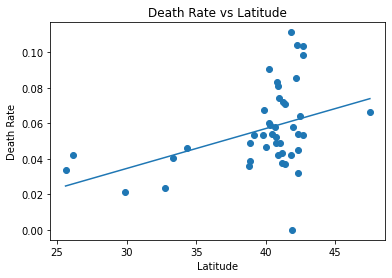

p-values: 0.005913323629038224
R^2: 0.1668322459180405
Slope: 0.002246899853141548


In [185]:
lin_regress(death_and_lat, 'Death Rate', 'Latitude', death_and_lat['Latitude'].min(), death_and_lat['Latitude'].max())

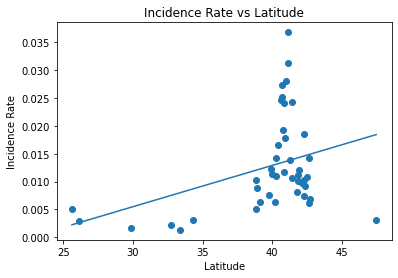

p-values: 0.014125752542173697
R^2: 0.1350516097934756
Slope: 0.0007405395801211514


In [186]:
lin_regress(inci_and_lat, 'Incidence Rate', 'Latitude', inci_and_lat['Latitude'].min(), inci_and_lat['Latitude'].max())

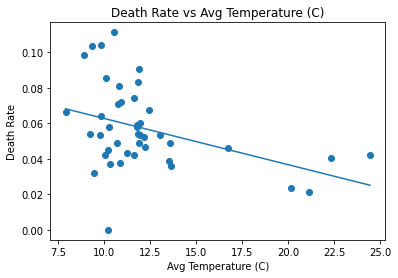

p-values: 0.008195201792279077
R^2: 0.15848931428369692
Slope: -0.0026011111471131985


In [187]:
lin_regress(death_and_temp, 'Death Rate', 'Avg Temperature (C)', death_and_temp['Avg Temperature (C)'].min(), death_and_temp['Avg Temperature (C)'].max())

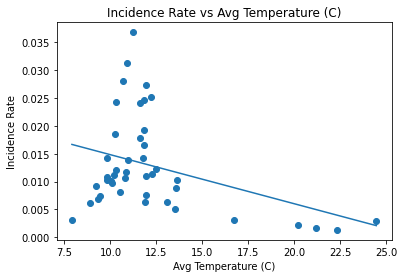

p-values: 0.015287672997469314
R^2: 0.135173816462034
Slope: -0.000881639211140244


In [188]:
lin_regress(inci_and_temp, 'Incidence Rate', 'Avg Temperature (C)', inci_and_temp['Avg Temperature (C)'].min(), inci_and_temp['Avg Temperature (C)'].max())

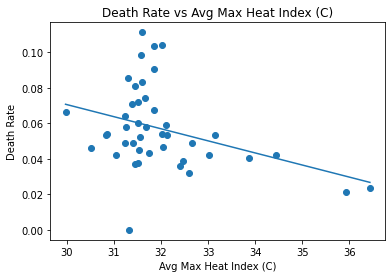

p-values: 0.01758058796841798
R^2: 0.12991659430508598
Slope: -0.006793789285030016


In [189]:
lin_regress(death_and_heatindex, 'Death Rate', 'Avg Max Heat Index (C)', death_and_heatindex['Avg Max Heat Index (C)'].min(), death_and_heatindex['Avg Max Heat Index (C)'].max())

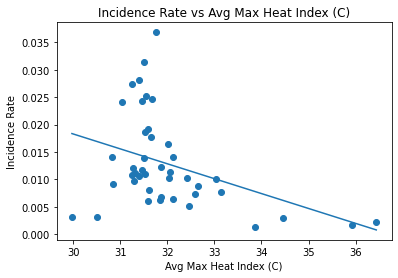

p-values: 0.009289874512530319
R^2: 0.1538224432838641
Slope: -0.0027131593658631156


In [190]:
lin_regress(inci_and_heatindex, 'Incidence Rate', 'Avg Max Heat Index (C)', inci_and_heatindex['Avg Max Heat Index (C)'].min(), inci_and_heatindex['Avg Max Heat Index (C)'].max())

In [191]:
lin_regress(death_and_unemploy, 'Death Rate', 'Unemployment Rate', death_and_unemploy['Unemployment Rate'].min(), death_and_unemploy['Unemployment Rate'].max())

In [192]:
lin_regress(inci_and_unemploy, 'Incidence Rate', 'Unemployment Rate', inci_and_unemploy['Unemployment Rate'].min(), inci_and_unemploy['Unemployment Rate'].max())

In [193]:
lin_regress(death_and_income, 'Death Rate', 'Median Household Income ($)', death_and_income['Median Household Income ($)'].min(), death_and_income['Median Household Income ($)'].max())

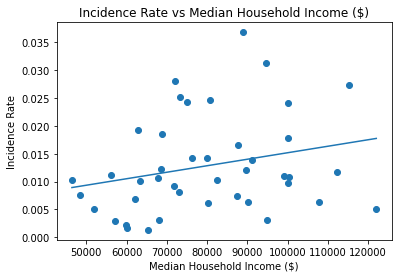

p-values: 0.10748914875608673
R^2: 0.06347487099655084
Slope: 1.1670012513433722e-07


In [194]:
lin_regress(inci_and_income, 'Incidence Rate', 'Median Household Income ($)', inci_and_income['Median Household Income ($)'].min(), inci_and_income['Median Household Income ($)'].max())

In [195]:
lin_regress(death_and_incomepercent, 'Death Rate', 'Median HH Income Percent of State Total', death_and_incomepercent['Median HH Income Percent of State Total'].min(), death_and_incomepercent['Median HH Income Percent of State Total'].max())

In [196]:
death_and_povrate.drop(death_and_povrate[death_and_povrate['Poverty Rate'] > 30].index, inplace=True)
lin_regress(death_and_povrate, 'Death Rate', 'Poverty Rate', death_and_povrate['Poverty Rate'].min(), death_and_povrate['Poverty Rate'].max())

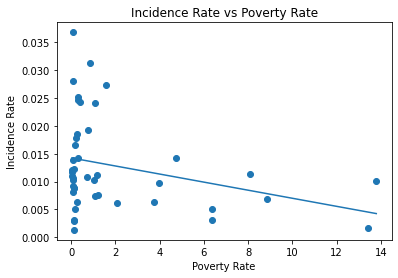

p-values: 0.05262341694556752
R^2: 0.08651409569036886
Slope: -0.0007252774916693672


In [197]:
inci_and_povrate.drop(inci_and_povrate[inci_and_povrate['Poverty Rate'] > 30].index, inplace=True)
lin_regress(inci_and_povrate, 'Incidence Rate', 'Poverty Rate', inci_and_povrate['Poverty Rate'].min(), inci_and_povrate['Poverty Rate'].max())

In [198]:
# lin_regress(death_and_urbinfl, 'Death Rate', 'Urban Influence Code', death_and_urbinfl['Urban Influence Code'].min(), death_and_urbinfl['Urban Influence Code'].max())

In [199]:
lin_regress(death_and_demo, 'Death Rate', '% Democrat Votes in 2016 Elections', death_and_demo['% Democrat Votes in 2016 Elections'].min(), death_and_demo['% Democrat Votes in 2016 Elections'].max())

In [205]:
lin_regress(inci_and_demo, 'Incidence Rate', '% Democrat Votes in 2016 Elections', inci_and_demo['% Democrat Votes in 2016 Elections'].min(), inci_and_demo['% Democrat Votes in 2016 Elections'].max())

R^2: 0.005159462231366651


In [200]:
lin_regress(death_and_aqi, 'Death Rate', 'Median AQI', death_and_aqi['Median AQI'].min(), death_and_aqi['Median AQI'].max())

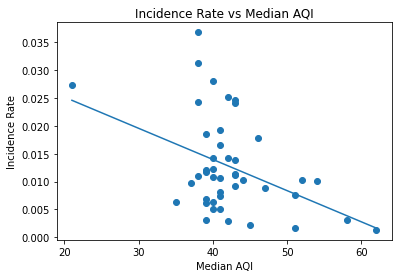

p-values: 0.004281772854229311
R^2: 0.17846460482470072
Slope: -0.0005597212093044293


In [201]:
lin_regress(inci_and_aqi, 'Incidence Rate', 'Median AQI', inci_and_aqi['Median AQI'].min(), inci_and_aqi['Median AQI'].max())

In [32]:
lin_regress(death_and_popden, 'Death Rate', 'Population Density (/mi^2)', death_and_popden['Population Density (/mi^2)'].min(), death_and_popden['Population Density (/mi^2)'].max())

R^2: 0.013806756059890504


In [31]:
lin_regress(inci_and_popden, 'Incidence Rate', 'Population Density (/mi^2)', inci_and_popden['Population Density (/mi^2)'].min(), inci_and_popden['Population Density (/mi^2)'].max())

R^2: 0.01270475658819159


In [38]:
# Clean up data
unemploy1.rename(columns={'Unemployment_rate_2018':'Unemployment Rate'},inplace=True)

unemploy2.rename(columns={'Median_Household_Income_2018':'Median Household Income ($)'},inplace=True)
unemploy2['Median Household Income ($)'] = unemploy2['Median Household Income ($)'].apply(update_income)

popden = death_and_popden['Population Density (/mi^2)']

# Export large data frame to csv
result = raw
for i in [death_rate, incidence_rate, temp, heat_index, unemploy1, unemploy2, poverty, pollution, popden]:
    result = result.join(i)

result.dropna(inplace=True)
print(result.columns)

result = result[['Population', 'Confirmed', 'Active', 'Incidence Rate', 'Deaths', 'Death Rate', 'Latitude',
                'Avg Temperature (C)', 'Avg Max Heat Index (C)', 'Median Household Income ($)', 
                'Unemployment Rate', 'Poverty Rate', 'Median AQI', 'Population Density (/mi^2)']]

result.to_csv('data_frame.csv', header=True)

result

Index(['Latitude', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population',
       'Death Rate', 'Incidence Rate', 'Avg Temperature (C)',
       'Avg Max Heat Index (C)', 'Unemployment Rate',
       'Median Household Income ($)', 'Poverty Rate', 'Median AQI',
       'Population Density (/mi^2)'],
      dtype='object')


,Population,Confirmed,Active,Incidence Rate,Deaths,Death Rate,Latitude,Avg Temperature (C),Avg Max Heat Index (C),Median Household Income ($),Unemployment Rate,Poverty Rate,Median AQI,Population Density (/mi^2)
"Bergen, NJ",936692,16929.0,15574.0,0.017752,1355.0,0.074109,40.960109,11.610,31.66,100181.0,3.4,0.24,46,3795.348460
"Broward, FL",1951260,5858.0,5601.0,0.002993,257.0,0.042028,26.151847,24.445,34.45,57200.0,3.4,0.13,42,1478.641740
"Cook, IL",5180493,52655.0,50338.0,0.010062,2317.0,0.042149,41.841448,10.030,33.03,63347.0,4.0,13.79,54,3168.419733
"Dallas, TX",2637772,5870.0,5727.0,0.002220,143.0,0.023782,32.766706,20.165,36.44,59838.0,3.7,51.15,45,2903.244695
"Essex, MA",790638,11353.0,10709.0,0.014156,644.0,0.053680,42.668763,9.790,30.82,76373.0,3.4,4.75,40,954.265989
"Essex, NJ",799767,15646.0,14223.0,0.019188,1423.0,0.083368,40.786813,11.835,31.59,62875.0,5.2,0.77,41,6172.946897
"Fairfax, VA",1150795,5892.0,5653.0,0.005094,239.0,0.038982,38.836776,13.530,32.46,122035.0,2.4,6.35,41,2830.218145
"Fairfax, VA",1150795,5892.0,5653.0,0.005094,239.0,0.038982,38.836776,13.530,32.46,122035.0,2.4,6.35,41,182376.386688
"Fairfield, CT",943823,13236.0,12212.0,0.013830,1024.0,0.071809,41.268099,10.945,31.51,91183.0,4.0,0.10,43,1127.679937
"Harris, TX",4698619,7878.0,7706.0,0.001674,172.0,0.021366,29.860000,21.160,35.93,60241.0,4.4,13.41,51,2643.103691
